In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import matplotlib.lines as mlines

In [2]:
city_file = "city_data.csv"
ride_file = "ride_data.csv"
city_file_df = pd.read_csv(city_file)
ride_file_df = pd.read_csv(ride_file)

city_file_df.head(3)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban


In [3]:
ride_file_df.head(3)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003


In [4]:
combined_df = pd.merge(ride_file_df, city_file_df, how='outer', on= 'city')
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [5]:
rides_per_city = combined_df.groupby("city")["ride_id"].count()
rides_per_city.head(4)


city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Name: ride_id, dtype: int64

In [6]:
types = combined_df.groupby("city")["type"].unique()
types.head(3)

city
Amandaburgh         [Urban]
Barajasview         [Urban]
Barronchester    [Suburban]
Name: type, dtype: object

In [7]:
avg_fare= combined_df.groupby(["city"])["fare"].sum() / combined_df.groupby(["city"])["ride_id"].count()
avg_fare.head(3)

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
dtype: float64

In [8]:
drivers= combined_df.groupby("city")["driver_count"].unique()
drivers.head(3)

city
Amandaburgh      [12]
Barajasview      [26]
Barronchester    [11]
Name: driver_count, dtype: object

In [9]:
rides = combined_df.groupby("city")["ride_id"].count()
rides.head(3)

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Name: ride_id, dtype: int64

In [10]:
fare_count = combined_df.groupby(["city"])["ride_id"].count()
fare_count.head(3)

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Name: ride_id, dtype: int64

In [11]:
fare_sum = combined_df.groupby(["city"])["fare"].sum()
fare_sum.head(3)

city
Amandaburgh      443.55
Barajasview      557.31
Barronchester    582.76
Name: fare, dtype: float64

In [12]:
summary = {'Type of City':types,
           'Average Fare':avg_fare,
           'Number of drivers':drivers,
           'Number of rides':rides,
           'Number of fares':fare_count,
           'Fares': fare_sum}

In [13]:
summary_df = pd.DataFrame(summary)
summary_df.head(10)

,Type of City,Average Fare,Number of drivers,Number of rides,Number of fares,Fares
city,,,,,,
Amandaburgh,[Urban],24.641667,[12],18,18,443.55
Barajasview,[Urban],25.332273,[26],22,22,557.31
Barronchester,[Suburban],36.422500,[11],16,16,582.76
Bethanyland,[Suburban],32.956111,[22],18,18,593.21
Bradshawfurt,[Rural],40.064000,[7],10,10,400.64
Brandonfort,[Suburban],35.437368,[10],19,19,673.31
Carriemouth,[Urban],28.314444,[52],27,27,764.49
Christopherfurt,[Urban],24.501852,[41],27,27,661.55
Colemanland,[Suburban],30.894545,[23],22,22,679.68


In [14]:
summary_df.dtypes

Type of City          object
Average Fare         float64
Number of drivers     object
Number of rides        int64
Number of fares        int64
Fares                float64
dtype: object

In [15]:
summary_df["Number of drivers"]= summary_df["Number of drivers"].astype(np.int64)
summary_df["Type of City"]= summary_df["Type of City"].astype(str)

summary_df["Type of City"]= summary_df["Type of City"].replace({"['Urban']":"Urban",
                                                                "['Suburban']":"Suburban",
                                                                "['Rural']":"Rural"})


In [16]:
summary_df.dtypes

Type of City          object
Average Fare         float64
Number of drivers      int64
Number of rides        int64
Number of fares        int64
Fares                float64
dtype: object

In [17]:
summary_df.head(5)

,Type of City,Average Fare,Number of drivers,Number of rides,Number of fares,Fares
city,,,,,,
Amandaburgh,Urban,24.641667,12,18,18,443.55
Barajasview,Urban,25.332273,26,22,22,557.31
Barronchester,Suburban,36.422500,11,16,16,582.76
Bethanyland,Suburban,32.956111,22,18,18,593.21
Bradshawfurt,Rural,40.064000,7,10,10,400.64


In [18]:
summary_df["Drivers 2"] = summary_df["Number of drivers"] * summary_df["Number of drivers"]
summary_df["Drivers 2"]= summary_df["Drivers 2"].astype(np.int64)
summary_df.head(5)

,Type of City,Average Fare,Number of drivers,Number of rides,Number of fares,Fares,Drivers 2
city,,,,,,,
Amandaburgh,Urban,24.641667,12,18,18,443.55,144
Barajasview,Urban,25.332273,26,22,22,557.31,676
Barronchester,Suburban,36.422500,11,16,16,582.76,121
Bethanyland,Suburban,32.956111,22,18,18,593.21,484
Bradshawfurt,Rural,40.064000,7,10,10,400.64,49


In [19]:
colors = ("coral", "skyblue", "gold")
def color_attribute(typ):
    colors={"Urban":"coral","Suburban":"skyblue","Rural":"gold"}
    return colors.get(typ,'white')
color_type = list()
qty_type = len(summary_df["Type of City"])
for i in range(qty_type):
    color_type.append(color_attribute(summary_df["Type of City"][i]))
color_type

['coral',
 'coral',
 'skyblue',
 'skyblue',
 'gold',
 'skyblue',
 'coral',
 'coral',
 'skyblue',
 'skyblue',
 'coral',
 'skyblue',
 'skyblue',
 'coral',
 'skyblue',
 'skyblue',
 'coral',
 'gold',
 'coral',
 'skyblue',
 'gold',
 'coral',
 'coral',
 'coral',
 'gold',
 'coral',
 'coral',
 'skyblue',
 'coral',
 'coral',
 'coral',
 'skyblue',
 'coral',
 'gold',
 'coral',
 'gold',
 'skyblue',
 'skyblue',
 'skyblue',
 'coral',
 'coral',
 'skyblue',
 'skyblue',
 'coral',
 'coral',
 'coral',
 'skyblue',
 'gold',
 'skyblue',
 'coral',
 'coral',
 'skyblue',
 'coral',
 'coral',
 'skyblue',
 'gold',
 'skyblue',
 'gold',
 'skyblue',
 'coral',
 'gold',
 'gold',
 'coral',
 'coral',
 'skyblue',
 'coral',
 'coral',
 'skyblue',
 'skyblue',
 'coral',
 'gold',
 'coral',
 'coral',
 'coral',
 'coral',
 'coral',
 'skyblue',
 'gold',
 'coral',
 'coral',
 'coral',
 'coral',
 'coral',
 'coral',
 'skyblue',
 'coral',
 'coral',
 'coral',
 'skyblue',
 'skyblue',
 'coral',
 'coral',
 'gold',
 'coral',
 'coral',
 'go

# Bubble Plot of Ride Sharing Data

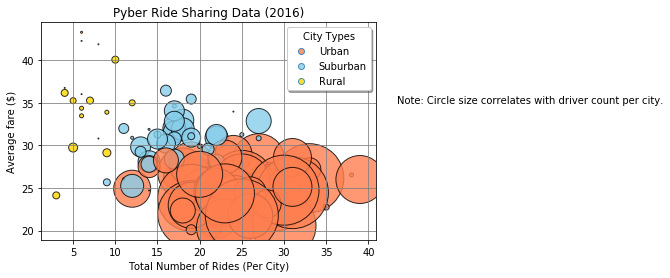

In [20]:
plt.scatter(x = summary_df["Number of rides"],
           y = summary_df["Average Fare"],
           s = summary_df["Drivers 2"], 
           c = color_type, alpha = 0.8, edgecolors = "black")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average fare ($)")
plt.figtext(.95, .6,"Note: Circle size correlates with driver count per city.")
plt.grid(b=True,which='major',color="gray",axis='both',)
city=["Urban","Suburban","Rural"]
legend = list()
for x in range(len(colors)):legend.append(mlines.Line2D([0], [0], linestyle='none', marker='o', alpha=0.8, markersize=6,
                                                        markerfacecolor=colors[x]))
legend1 = plt.legend(legend, city, numpoints=1, fontsize=10, loc='upper right', title = 'City Types', shadow=True)

plt.show()

#  Total Fares by City Type

In [21]:
fares_by_city = summary_df.groupby("Type of City")["Fares"].sum() / summary_df["Fares"].sum() * 100
fares_by_city

Type of City
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: Fares, dtype: float64

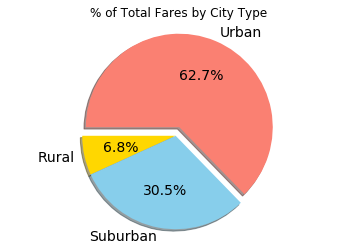

In [22]:
type_city = ["Rural", "Suburban", "Urban"]
percentages = fares_by_city
colors = ["gold", "skyblue", "salmon"]
explode = (0,0,0.1)


plt.pie(percentages, explode=explode, labels=type_city, colors=colors, autopct='%1.1f%%',
        shadow=True,startangle=180,textprops={'color':"black",'fontsize': 14},)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

#  Total Rides by City Type

In [23]:
rides_by_city=summary_df.groupby("Type of City")["Number of rides"].sum()/summary_df["Number of rides"].sum()*100
rides_by_city

Type of City
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: Number of rides, dtype: float64

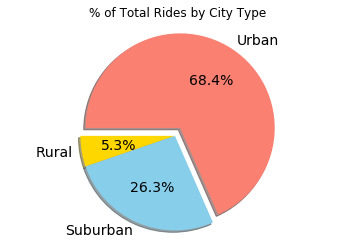

In [24]:
type_city = ["Rural", "Suburban", "Urban"]
percentages = rides_by_city
colors = ["gold", "skyblue", "salmon"]
explode = (0,0,0.1)


plt.pie(percentages, explode=explode, labels=type_city, colors=colors, autopct='%1.1f%%',
        shadow=True,startangle=180,textprops={'color':"black",'fontsize': 14},)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

#  Total Drivers by City Type

In [25]:
drivers_by_city = summary_df.groupby("Type of City")["Number of drivers"].sum() / summary_df["Number of drivers"].sum() * 100
drivers_by_city

Type of City
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: Number of drivers, dtype: float64

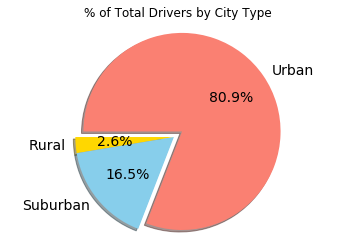

In [26]:
type_city = ["Rural", "Suburban", "Urban"]
percentages = drivers_by_city
colors = ["gold", "skyblue", "salmon"]
explode = (0,0,0.1)

plt.pie(percentages, explode=explode, labels=type_city, colors=colors, autopct='%1.1f%%',
        shadow=True,startangle=180,textprops={'color':"black",'fontsize': 14},)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()